# Import library dan memuat dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Muat dataset
# https://archive.ics.uci.edu/dataset/2/adult
df = pd.read_csv('adult.csv')

In [2]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.tail(5)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

# Data Understanding

## Explanatory Data Analysis dan Visualisasi

In [5]:
# Untuk fitur bertipe numeric
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numerical_features].describe())


                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


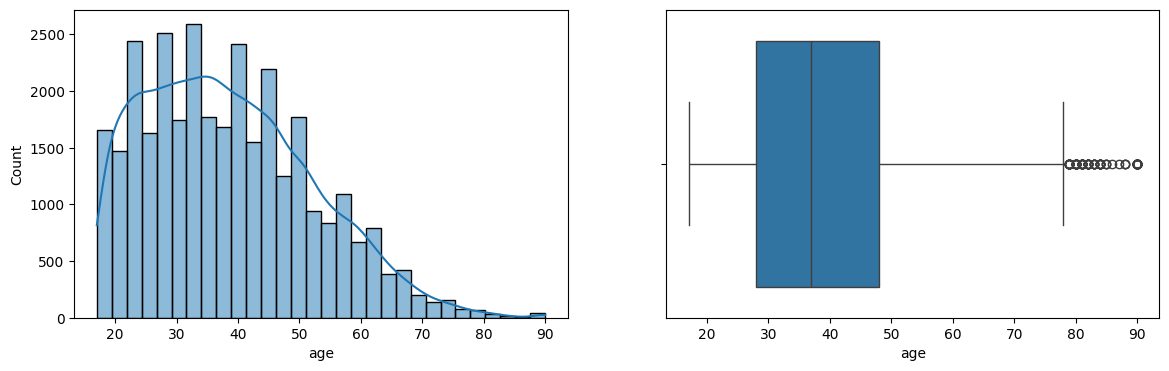

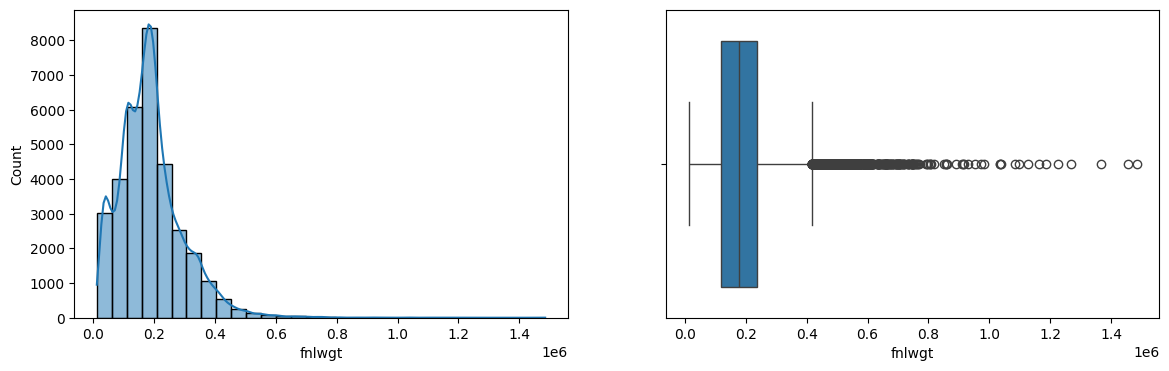

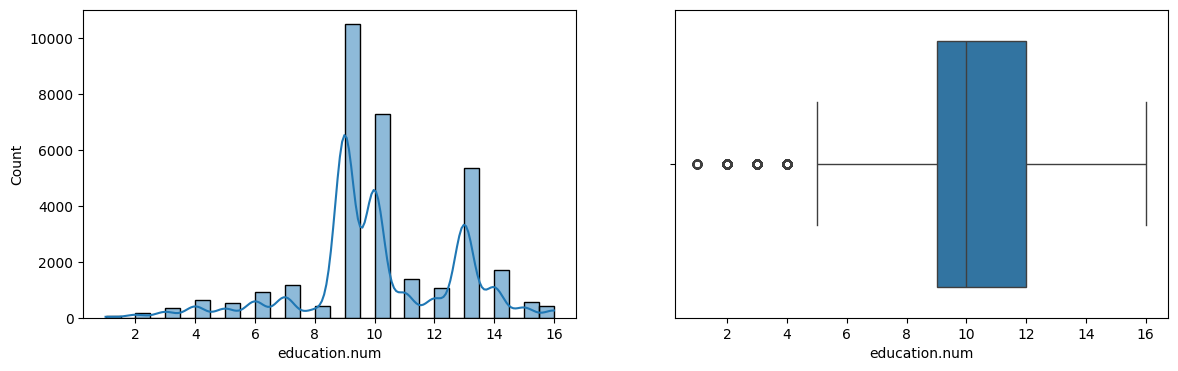

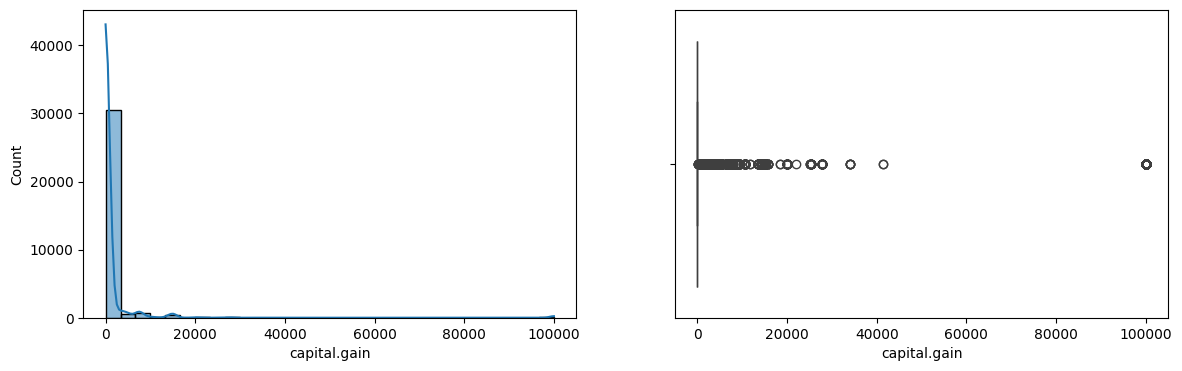

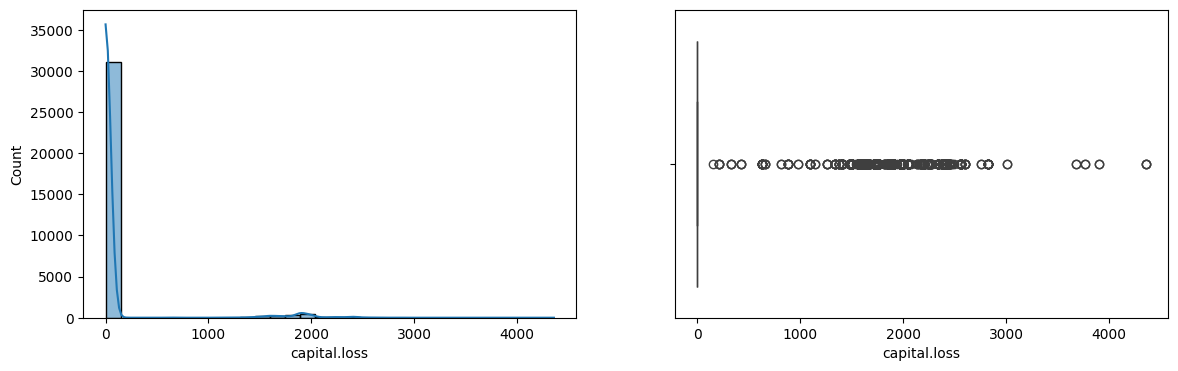

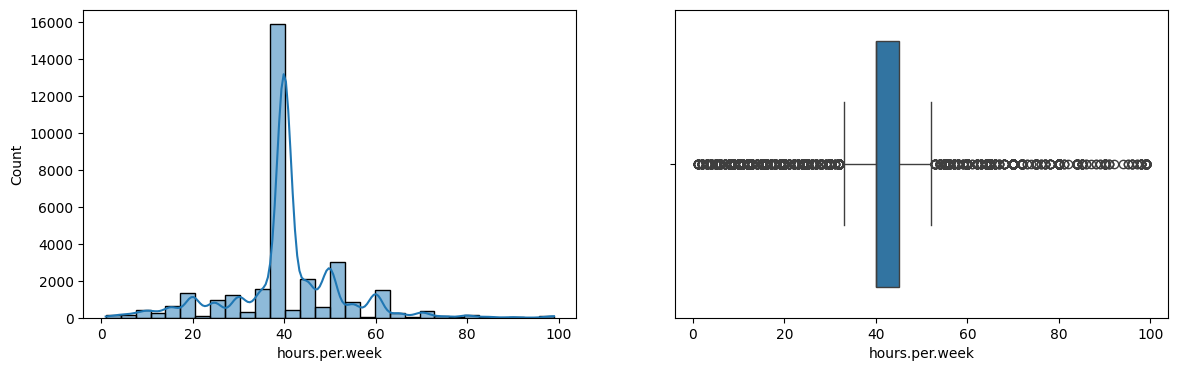

In [6]:
# Visualisasi fitur bertipe numeric
for feature in numerical_features:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[feature], bins=30, ax=ax[0], kde=True)
    sns.boxplot(x=df[feature], ax=ax[1])
    plt.show()


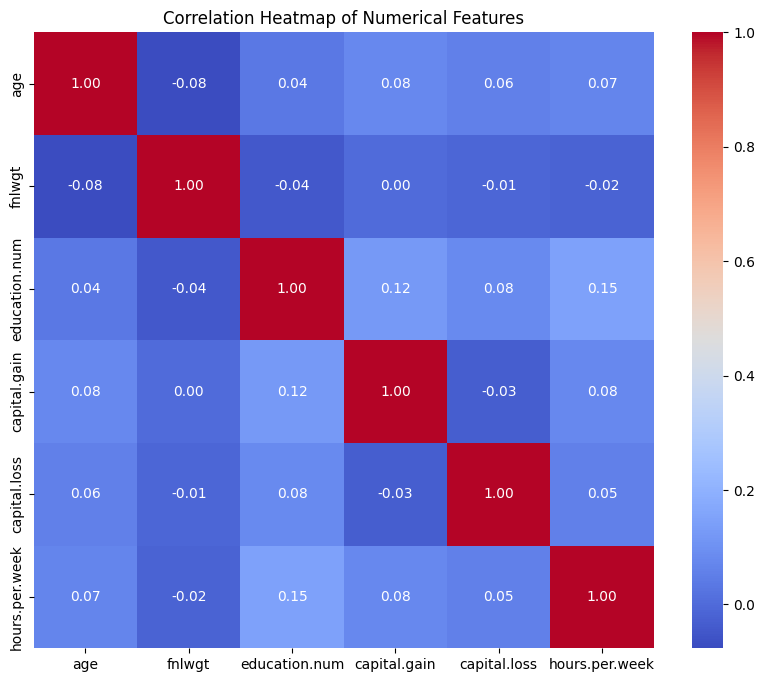

In [7]:
# Menghitung korelasi antar fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi plotting headmap korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [8]:
# Untuk fitur bertipe kategori
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    print(df[feature].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

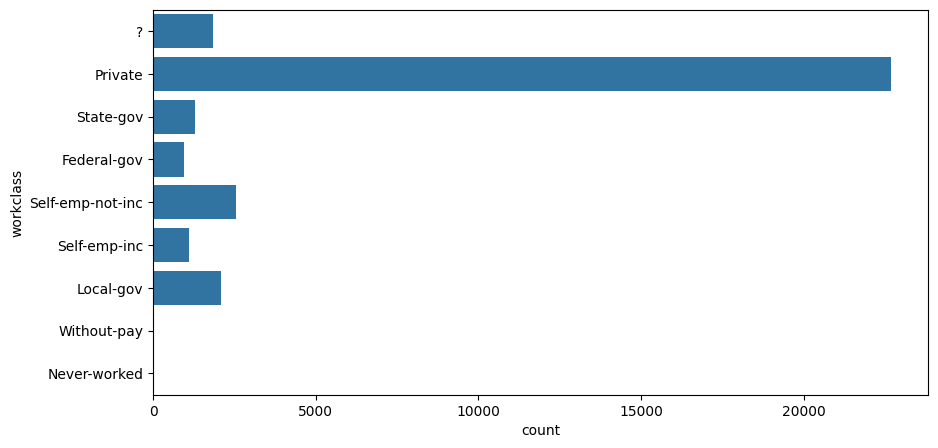

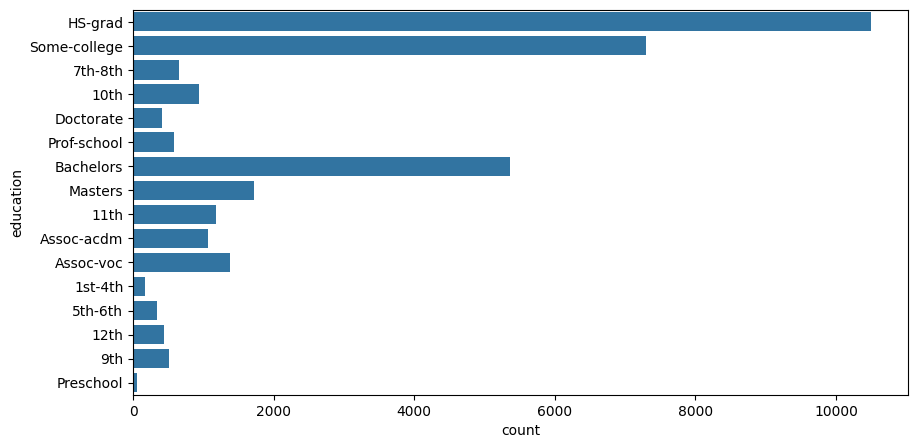

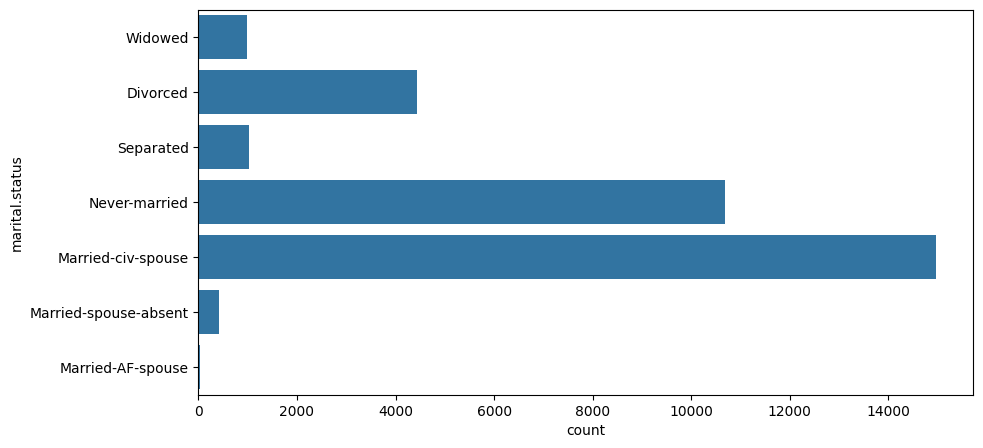

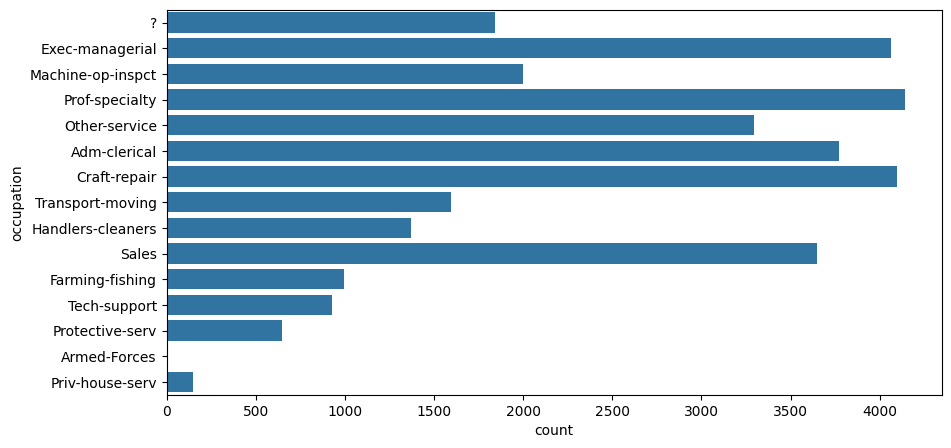

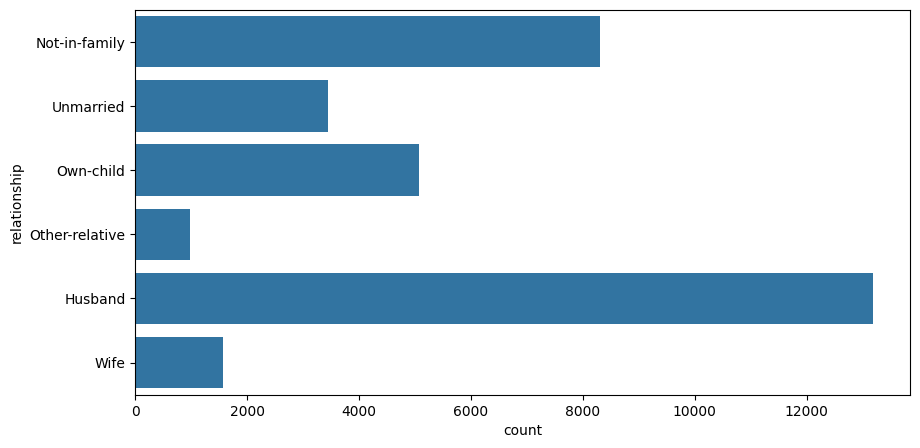

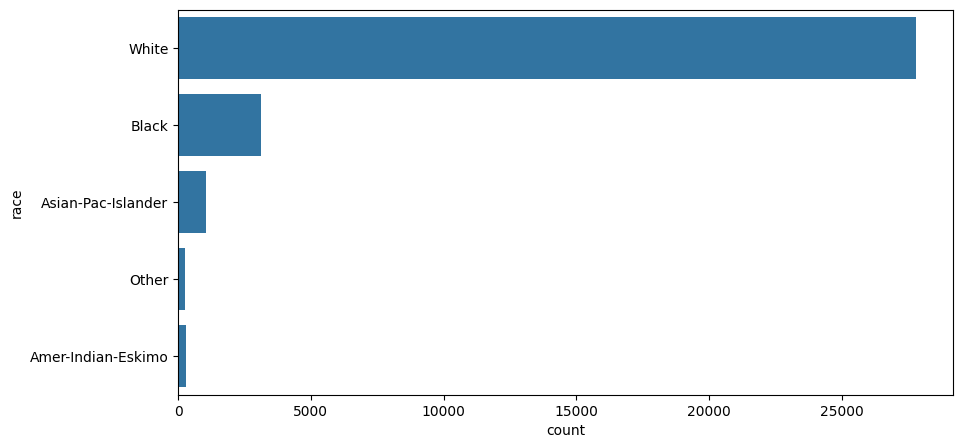

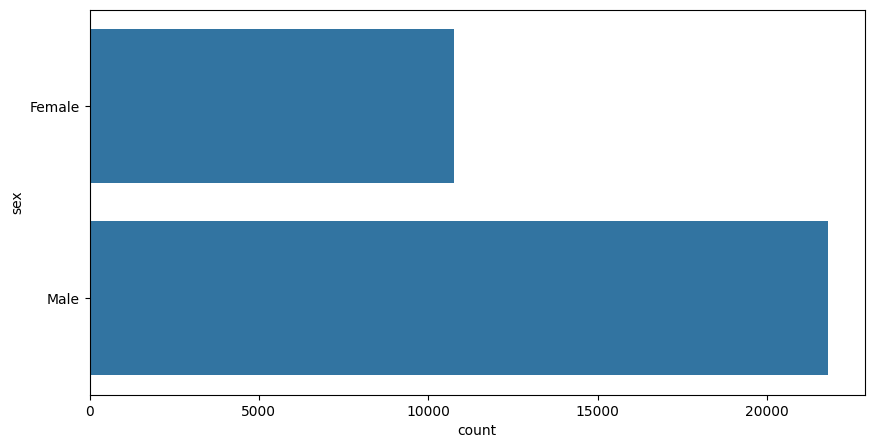

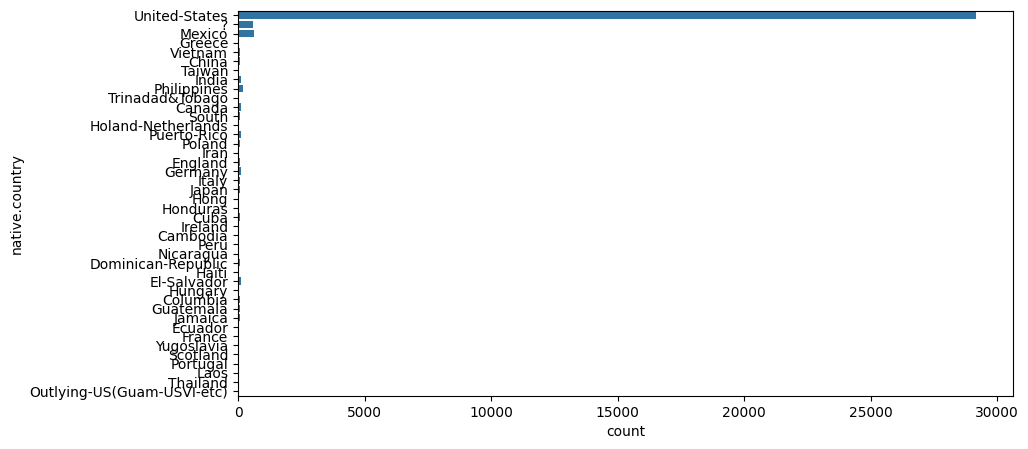

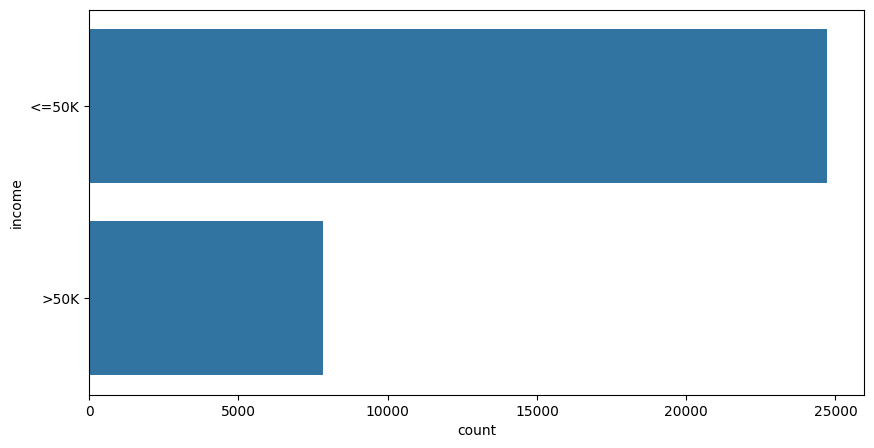

In [9]:
# Visualisasi fitur bertipe kategori
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=feature, data=df)
    plt.show()


# Data Preparation

## Penanganan Missing Values

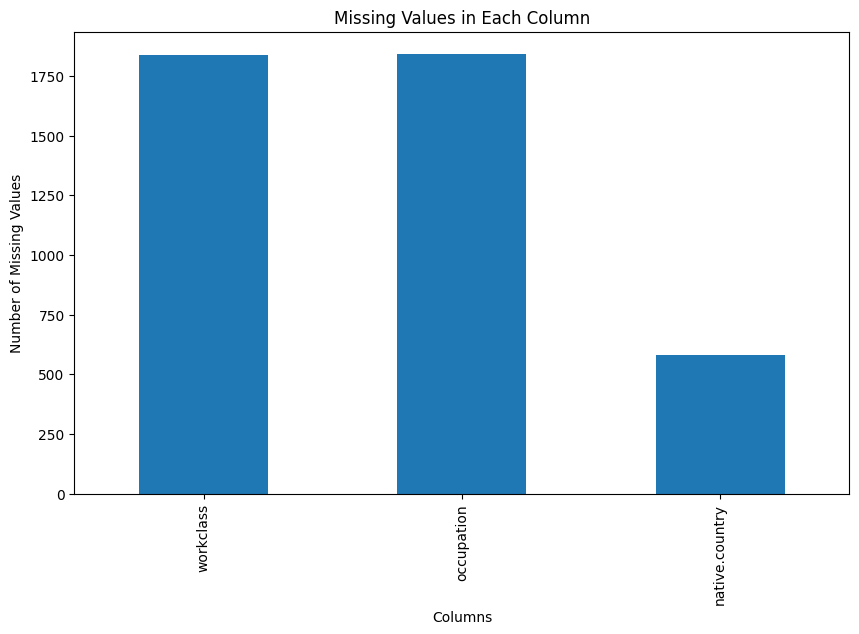

workclass         1836
occupation        1843
native.country     583
dtype: int64

In [10]:
# Mengganti nilai '?' dengan NaN untuk memudahkan penanganan missing values
df.replace('?', np.nan, inplace=True)

# Menghitung jumlah NaN di setiap kolom untuk mengindetifikasi missing values
missing_values = df.isnull().sum()

# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values[missing_values > 0]


In [11]:
# Mengisi missing values fitur 'workclass' and 'occupation' dengan 'Unknown'
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

# Mengisi missing values fitur 'native.country' dengan modusnya (nilai paling sering muncul)
native_country_mode = df['native.country'].mode()[0]
df['native.country'].fillna(native_country_mode, inplace=True)

# Memeriksa kembali missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


## Penyederhanaan Distribusi Fitur

In [12]:
# Menentukan fitur numerik dan kategorikal untuk pemodelan
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Menghapus fitur 'fnlwgt' dan 'income'
numeric_features.remove('fnlwgt')
categorical_features.remove('income')

In [13]:
# Menentukan minimal sample untuk negara yang akan diubah menjadi 'Other'
min_samples = 50

# Mengubah nama negara dengan nilai di bawah minimal menjadi 'Other'
df['native.country'] = df['native.country'].apply(lambda x: x if df['native.country'].value_counts()[x] > min_samples else 'Other')

# Menampilkan hasil untuk verifikasi distribusi setelah diubah
aggregated_native_country_distribution = df['native.country'].value_counts()
print(aggregated_native_country_distribution)


United-States         29753
Mexico                  643
Other                   462
Philippines             198
Germany                 137
Canada                  121
Puerto-Rico             114
El-Salvador             106
India                   100
Cuba                     95
England                  90
Jamaica                  81
South                    80
China                    75
Italy                    73
Dominican-Republic       70
Vietnam                  67
Guatemala                64
Japan                    62
Poland                   60
Columbia                 59
Taiwan                   51
Name: native.country, dtype: int64


## Persiapan dan Splitting Dataset

In [14]:
# Membuat transformer untuk pra-pemrosesan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [15]:
# Memisahkan fitur dan target dan membagi set pelatihan dan pengujian
X = df.drop(['income', 'fnlwgt'], axis=1)
y = df['income'].map({'<=50K': 0, '>50K': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Menerapkan pra-pemrosesan
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Dictionary untuk menyimpan hasil akurasi
model_accuracies = {}

# Modeling

## Logistic Regression

In [17]:
# Inisialisasi dan evaluasi Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_preprocessed, y_train)
y_pred_lr = lr_model.predict(X_test_preprocessed)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = accuracy_lr
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8462
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.72      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



## Decision Tree

In [18]:
# Inisialisasi dan evaluasi Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_preprocessed, y_train)
y_pred_dt = dt_model.predict(X_test_preprocessed)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = accuracy_dt
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8230
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4976
           1       0.63      0.60      0.62      1537

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



## Random Forest

In [19]:
# Inisialisasi dan evaluasi Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_preprocessed, y_train)
y_pred_rf = rf_model.predict(X_test_preprocessed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = accuracy_rf
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8465
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4976
           1       0.70      0.62      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



## XGBoost

In [20]:
# Inisialisasi dan evaluasi XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_preprocessed, y_train)
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
model_accuracies['XGBoost'] = accuracy_xgb
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8706
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4976
           1       0.77      0.64      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



## SVM

In [21]:
# Inisialisasi dan evaluasi SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_preprocessed, y_train)
y_pred_svm = svm_model.predict(X_test_preprocessed)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
model_accuracies['SVM'] = accuracy_svm
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4976
           1       0.75      0.56      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.78      6513
weighted avg       0.84      0.85      0.84      6513



## Hasil Modeling

In [22]:
# Cetak hasil akurasi setiap model
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Membandingkan model berdasarkan akurasi
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nModel dengan akurasi terbaik: {best_model} (Akurasi: {model_accuracies[best_model]:.4f})")

Logistic Regression Accuracy: 0.8462
Decision Tree Accuracy: 0.8230
Random Forest Accuracy: 0.8465
XGBoost Accuracy: 0.8706
SVM Accuracy: 0.8523

Model dengan akurasi terbaik: XGBoost (Akurasi: 0.8706)


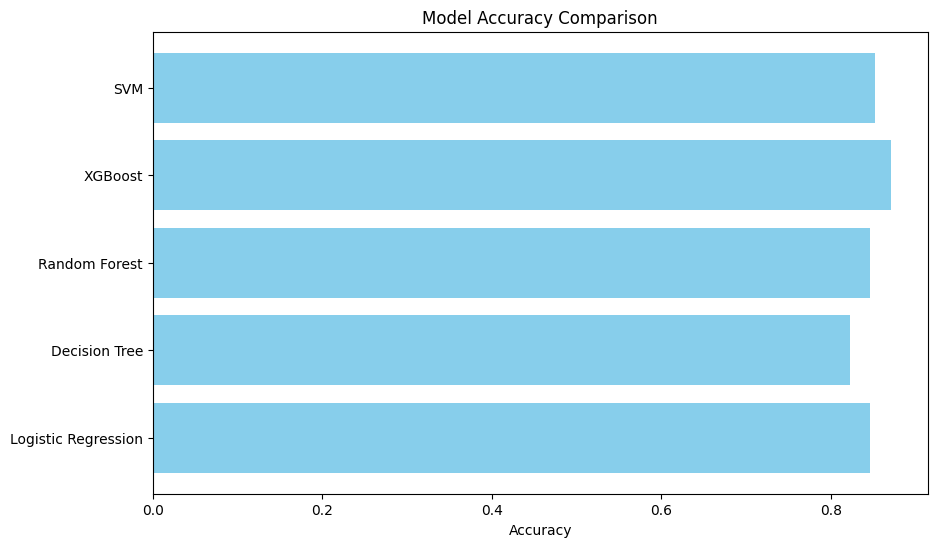

In [23]:
# Visualisasi akurasi semua model
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


# Optimasi Dengan Hyperparameter Grid Search

## XGBoost

In [24]:
from sklearn.model_selection import GridSearchCV

# Dictionary untuk menyimpan hasil akurasi terbaik dengan hyperparameter
best_model_accuracies = {}

# Definisikan kisi hyperparameter untuk XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Grid search untuk XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                               xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train_preprocessed, y_train)
best_model_accuracies['XGBoost'] = xgb_grid_search.best_score_
print("Best hyperparameters for XGBoost:", xgb_grid_search.best_params_)
print("Best accuracy for XGBoost:", xgb_grid_search.best_score_)

Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy for XGBoost: 0.872850098143292


## Random Forest

In [25]:
# Definisikan kisi hyperparameter untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search untuk Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_preprocessed, y_train)
best_model_accuracies['Random Forest'] = rf_grid_search.best_score_
print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)
print("Best accuracy for Random Forest:", rf_grid_search.best_score_)

Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8639049275780992


## SVM

In [26]:
# Definisikan kisi hyperparameter untuk SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Grid search untuk SVM
svm_grid_search = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train_preprocessed, y_train)
best_model_accuracies['SVM'] = svm_grid_search.best_score_
print("Best hyperparameters for SVM:", svm_grid_search.best_params_)
print("Best accuracy for SVM:", svm_grid_search.best_score_)

Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVM: 0.8563420832613271


## Hasil Optimasi

In [27]:
# Membandingkan model berdasarkan akurasi terbaik dengan hyperparameter
best_hyper_model = max(best_model_accuracies, key=best_model_accuracies.get)
print(f"\nModel dengan akurasi terbaik setelah tuning hyperparameter: {best_hyper_model} (Akurasi: {best_model_accuracies[best_hyper_model]:.4f})")


Model dengan akurasi terbaik setelah tuning hyperparameter: XGBoost (Akurasi: 0.8729)
